In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('TTO_offices_for_ all_100_univerities - Sheet1.csv')

In [9]:
df

,Country,Name of University,Description,Worth pursuing (Y/N),Flags,Observations for approaching strategy,Website Uni,Website TTO,Contact point,Name of contact point,Unnamed: 10
0,Belgium,KU Leuven,NaN,NaN,NaN,NaN,https://lrd.kuleuven.be/en,NaN,Email: https://www.linkedin.com/showcase/kuleu...,NaN,NaN
1,Germany,University of Erlangen Nuremberg,NaN,NaN,NaN,NaN,https://www.fau.eu/,NaN,NaN,NaN,NaN
2,United Kingdom,Imperial College London,NaN,NaN,NaN,NaN,https://www.imperial.ac.uk/,NaN,NaN,NaN,NaN
3,United Kingdom,University of Cambridg,NaN,NaN,NaN,NaN,https://map.cam.ac.uk/,https://www.enterprise.cam.ac.uk/,"Address: University of Cambridge, Hauser Forum...",Name: Dr Iain Thomas \nPosition: Head of Life ...,NaN
4,Switzerland,EPFL - Swiss Federal lnstitute of Technology L...,NaN,NaN,NaN,NaN,https://www.epfl.ch/en/,https://search.epfl.ch/?filter=unit&q=I-VP,Address: QIJ 1 117.08 (EPFL Innovation Park J)...,Name: Ursula Oesterle\nPosition: Vice Presiden...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
90,Italy,University of Padova,NaN,NaN,NaN,NaN,https://www.unipd.it/en/innovation-business-re...,NaN,NaN,NaN,NaN
91,France,University of Nice Sophia Antipolis,NaN,NaN,NaN,NaN,https://univ-cotedazur.eu/,https://life.univ-cotedazur.eu/research-and-in...,NaN,NaN,NaN
92,Germany,Darmstadt University of Technology,NaN,NaN,NaN,NaN,https://www.tu-darmstadt.de/,NaN,NaN,Name: Deniz Bayramoglu\nPosition: Head of IP- ...,NaN
93,Italy,Sapienza University Rome,NaN,NaN,NaN,NaN,https://www.uniroma1.it/en/pagina-strutturale/...,https://www.uniroma1.it/en/pagina/innovation-a...,NaN,Name: Daniele Riccioni\nPosition: Head of Inno...,NaN


In [10]:
df_grouped = df.groupby('Country').agg({
    'Name of University': lambda x: ', '.join(x),
    'Name of University': 'count'
}).reset_index()

df_grouped.columns = ['Country', 'Number of Universities']

df_grouped['List of Universities'] = df.groupby('Country')['Name of University'].apply(list).reset_index(drop=True)

df_grouped

,Country,Number of Universities,List of Universities
0,Austria,1,[Vienna University of Technology]
1,Belgium,6,"[KU Leuven, Free University of Brussels, Catho..."
2,Denmark,3,"[Technical University of Denmark, University o..."
3,France,18,"[University of Paris Sud - Paris 11, Universit..."
4,Germany,23,"[University of Erlangen Nuremberg, Technical U..."
5,Ireland,1,[Trinity College Dublin]
6,Italy,4,"[Politecnico University of Milano, University ..."
7,Netherlands,9,"[Leiden University, Delft University of Techno..."
8,Norway,2,"[University of Oslo, Norwegian University of S..."
9,Poland,1,[Jagiellonian University]


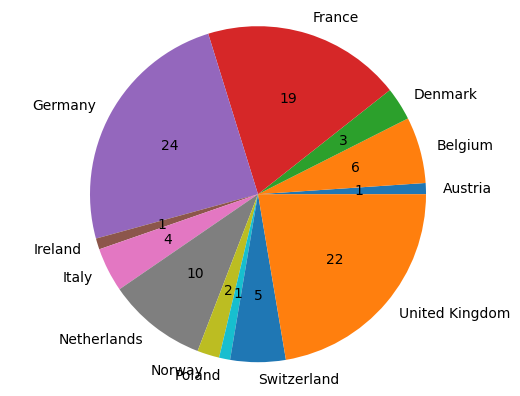

In [11]:
df_grouped = df.groupby('Country').size().reset_index(name='Number of Universities')

plt.pie(df_grouped['Number of Universities'], labels=df_grouped['Country'], autopct='%1.0f')
plt.axis('equal')
plt.show()

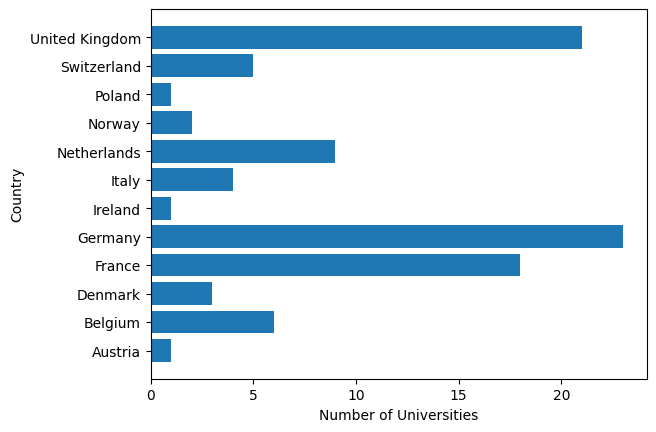

In [12]:
plt.barh(df_grouped['Country'], df_grouped['Number of Universities'])
plt.xlabel('Number of Universities')
plt.ylabel('Country')
plt.show()

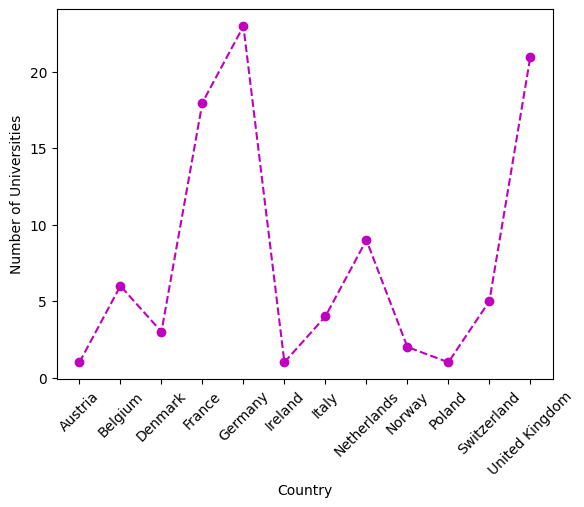

In [13]:
plt.plot(df_grouped['Country'], df_grouped['Number of Universities'], 'o--m')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.ylabel('Number of Universities')
plt.show()

In [14]:
selected_columns = ['Country', 'Name of University', 'Website Uni', 'Website TTO']
df_selected = df[selected_columns]

df_selected

,Country,Name of University,Website Uni,Website TTO
0,Belgium,KU Leuven,https://lrd.kuleuven.be/en,NaN
1,Germany,University of Erlangen Nuremberg,https://www.fau.eu/,NaN
2,United Kingdom,Imperial College London,https://www.imperial.ac.uk/,NaN
3,United Kingdom,University of Cambridg,https://map.cam.ac.uk/,https://www.enterprise.cam.ac.uk/
4,Switzerland,EPFL - Swiss Federal lnstitute of Technology L...,https://www.epfl.ch/en/,https://search.epfl.ch/?filter=unit&q=I-VP
...,...,...,...,...
90,Italy,University of Padova,https://www.unipd.it/en/innovation-business-re...,NaN
91,France,University of Nice Sophia Antipolis,https://univ-cotedazur.eu/,https://life.univ-cotedazur.eu/research-and-in...
92,Germany,Darmstadt University of Technology,https://www.tu-darmstadt.de/,NaN
93,Italy,Sapienza University Rome,https://www.uniroma1.it/en/pagina-strutturale/...,https://www.uniroma1.it/en/pagina/innovation-a...


In [16]:
df['Address'] = df['Contact point'].str.split('Address:').str[0].str.replace('Address:', '').str.strip()
df['Phone'] = df['Contact point'].str.split('Phone:').str[1].str.split('Phone:').str[0].str.strip()
df['Email'] = df['Contact point'].str.split('Email:').str[1].str.strip()
df = df.fillna('[]')

contact_point = ['Address', 'Phone', 'Email']
df_contact_point = df[contact_point]

df_contact_point

,Address,Phone,Email
0,Email: https://www.linkedin.com/showcase/kuleu...,[],https://www.linkedin.com/showcase/kuleuven-inn...
1,[],[],[]
2,[],[],[]
3,,+44 1223 760339\nEmail: enquiries@enterprise.c...,enquiries@enterprise.cam.ac.uk
4,,+41 21 693 86 74,[]
...,...,...,...
90,[],[],[]
91,[],[],[]
92,[],[],[]
93,[],[],[]


In [17]:
pattern = r"Name:(.*?)\s*Position:(.*?)\s*Phone:(.*?)\s*Email:(.*?)\s*Link:(.*?)$"
contact_extract = df['Name of contact point'].str.extract(pattern, expand=True)

df['Name'] = contact_extract[0].str.split(',').apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else [])
df['Position'] = contact_extract[1].str.split(',').apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else [])
df['Phone'] = contact_extract[2].str.split(',').apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else [])
df['Email'] = contact_extract[3].str.split(',').apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else [])
df['Link'] = contact_extract[4].str.split(',').apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else [])

df

,Country,Name of University,Description,Worth pursuing (Y/N),Flags,Observations for approaching strategy,Website Uni,Website TTO,Contact point,Name of contact point,Unnamed: 10,Address,Phone,Email,Name,Position,Link
0,Belgium,KU Leuven,[],[],[],[],https://lrd.kuleuven.be/en,[],Email: https://www.linkedin.com/showcase/kuleu...,[],[],Email: https://www.linkedin.com/showcase/kuleu...,[],[],[],[],[]
1,Germany,University of Erlangen Nuremberg,[],[],[],[],https://www.fau.eu/,[],[],[],[],[],[],[],[],[],[]
2,United Kingdom,Imperial College London,[],[],[],[],https://www.imperial.ac.uk/,[],[],[],[],[],[],[],[],[],[]
3,United Kingdom,University of Cambridg,[],[],[],[],https://map.cam.ac.uk/,https://www.enterprise.cam.ac.uk/,"Address: University of Cambridge, Hauser Forum...",Name: Dr Iain Thomas \nPosition: Head of Life ...,[],,[],[],[],[],[]
4,Switzerland,EPFL - Swiss Federal lnstitute of Technology L...,[],[],[],[],https://www.epfl.ch/en/,https://search.epfl.ch/?filter=unit&q=I-VP,Address: QIJ 1 117.08 (EPFL Innovation Park J)...,Name: Ursula Oesterle\nPosition: Vice Presiden...,[],,[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Italy,University of Padova,[],[],[],[],https://www.unipd.it/en/innovation-business-re...,[],[],[],[],[],[],[],[],[],[]
91,France,University of Nice Sophia Antipolis,[],[],[],[],https://univ-cotedazur.eu/,https://life.univ-cotedazur.eu/research-and-in...,[],[],[],[],[],[],[],[],[]
92,Germany,Darmstadt University of Technology,[],[],[],[],https://www.tu-darmstadt.de/,[],[],Name: Deniz Bayramoglu\nPosition: Head of IP- ...,[],[],[],[],[],[],[]
93,Italy,Sapienza University Rome,[],[],[],[],https://www.uniroma1.it/en/pagina-strutturale/...,https://www.uniroma1.it/en/pagina/innovation-a...,[],Name: Daniele Riccioni\nPosition: Head of Inno...,[],[],[],[],[],[],[]
